# Perform Principal component analysis and perform clustering using first 
# 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
# optimum number of clusters and check whether we have obtained same number of clusters with the original data 
# (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
# import the required libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data set wine.csv
df = pd.read_csv('wine.csv')
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [3]:
# basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.duplicated().sum()

0

# From the above, we can confirm that there are no null and duplicated values

# Do EDA

In [5]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

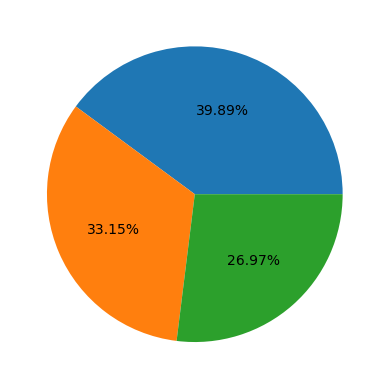

In [7]:
plt.pie(df['Type'].value_counts(),autopct='%0.2f%%');

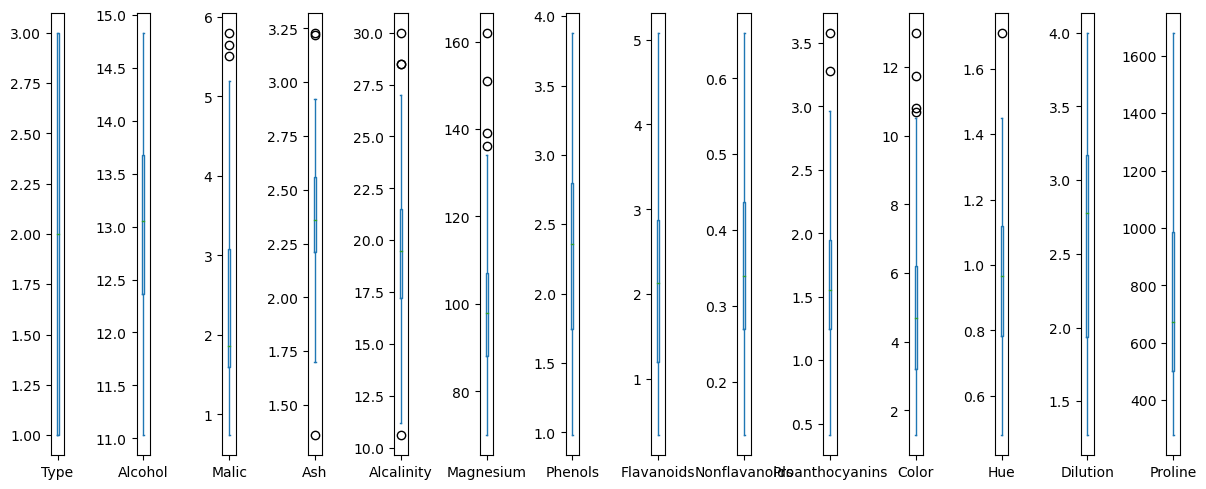

In [8]:
df.plot(kind = 'box',subplots = True,figsize = (12,5))
plt.tight_layout();

In [9]:
corel = df.corr()
corel

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

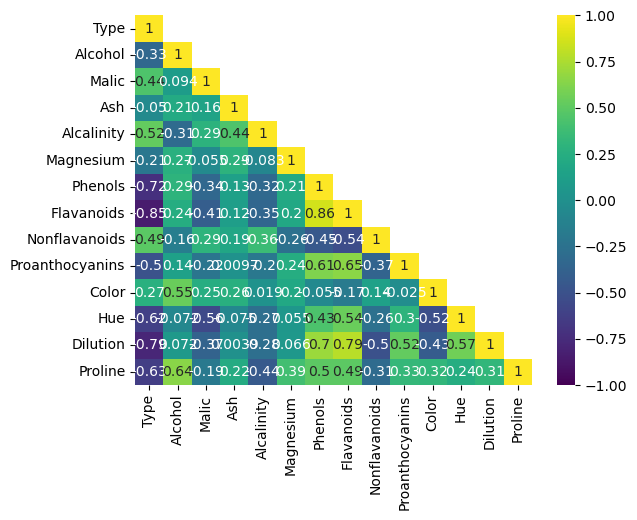

In [10]:
# Heat map visualisation
sns.heatmap(data = corel,vmin = -1, vmax = 1,annot = True , mask = np.triu(corel,1),cmap = 'viridis');

# There is no strong correlation between any two variables , except flavonoids vs dilution and type vs dilution, type vs flavonoids

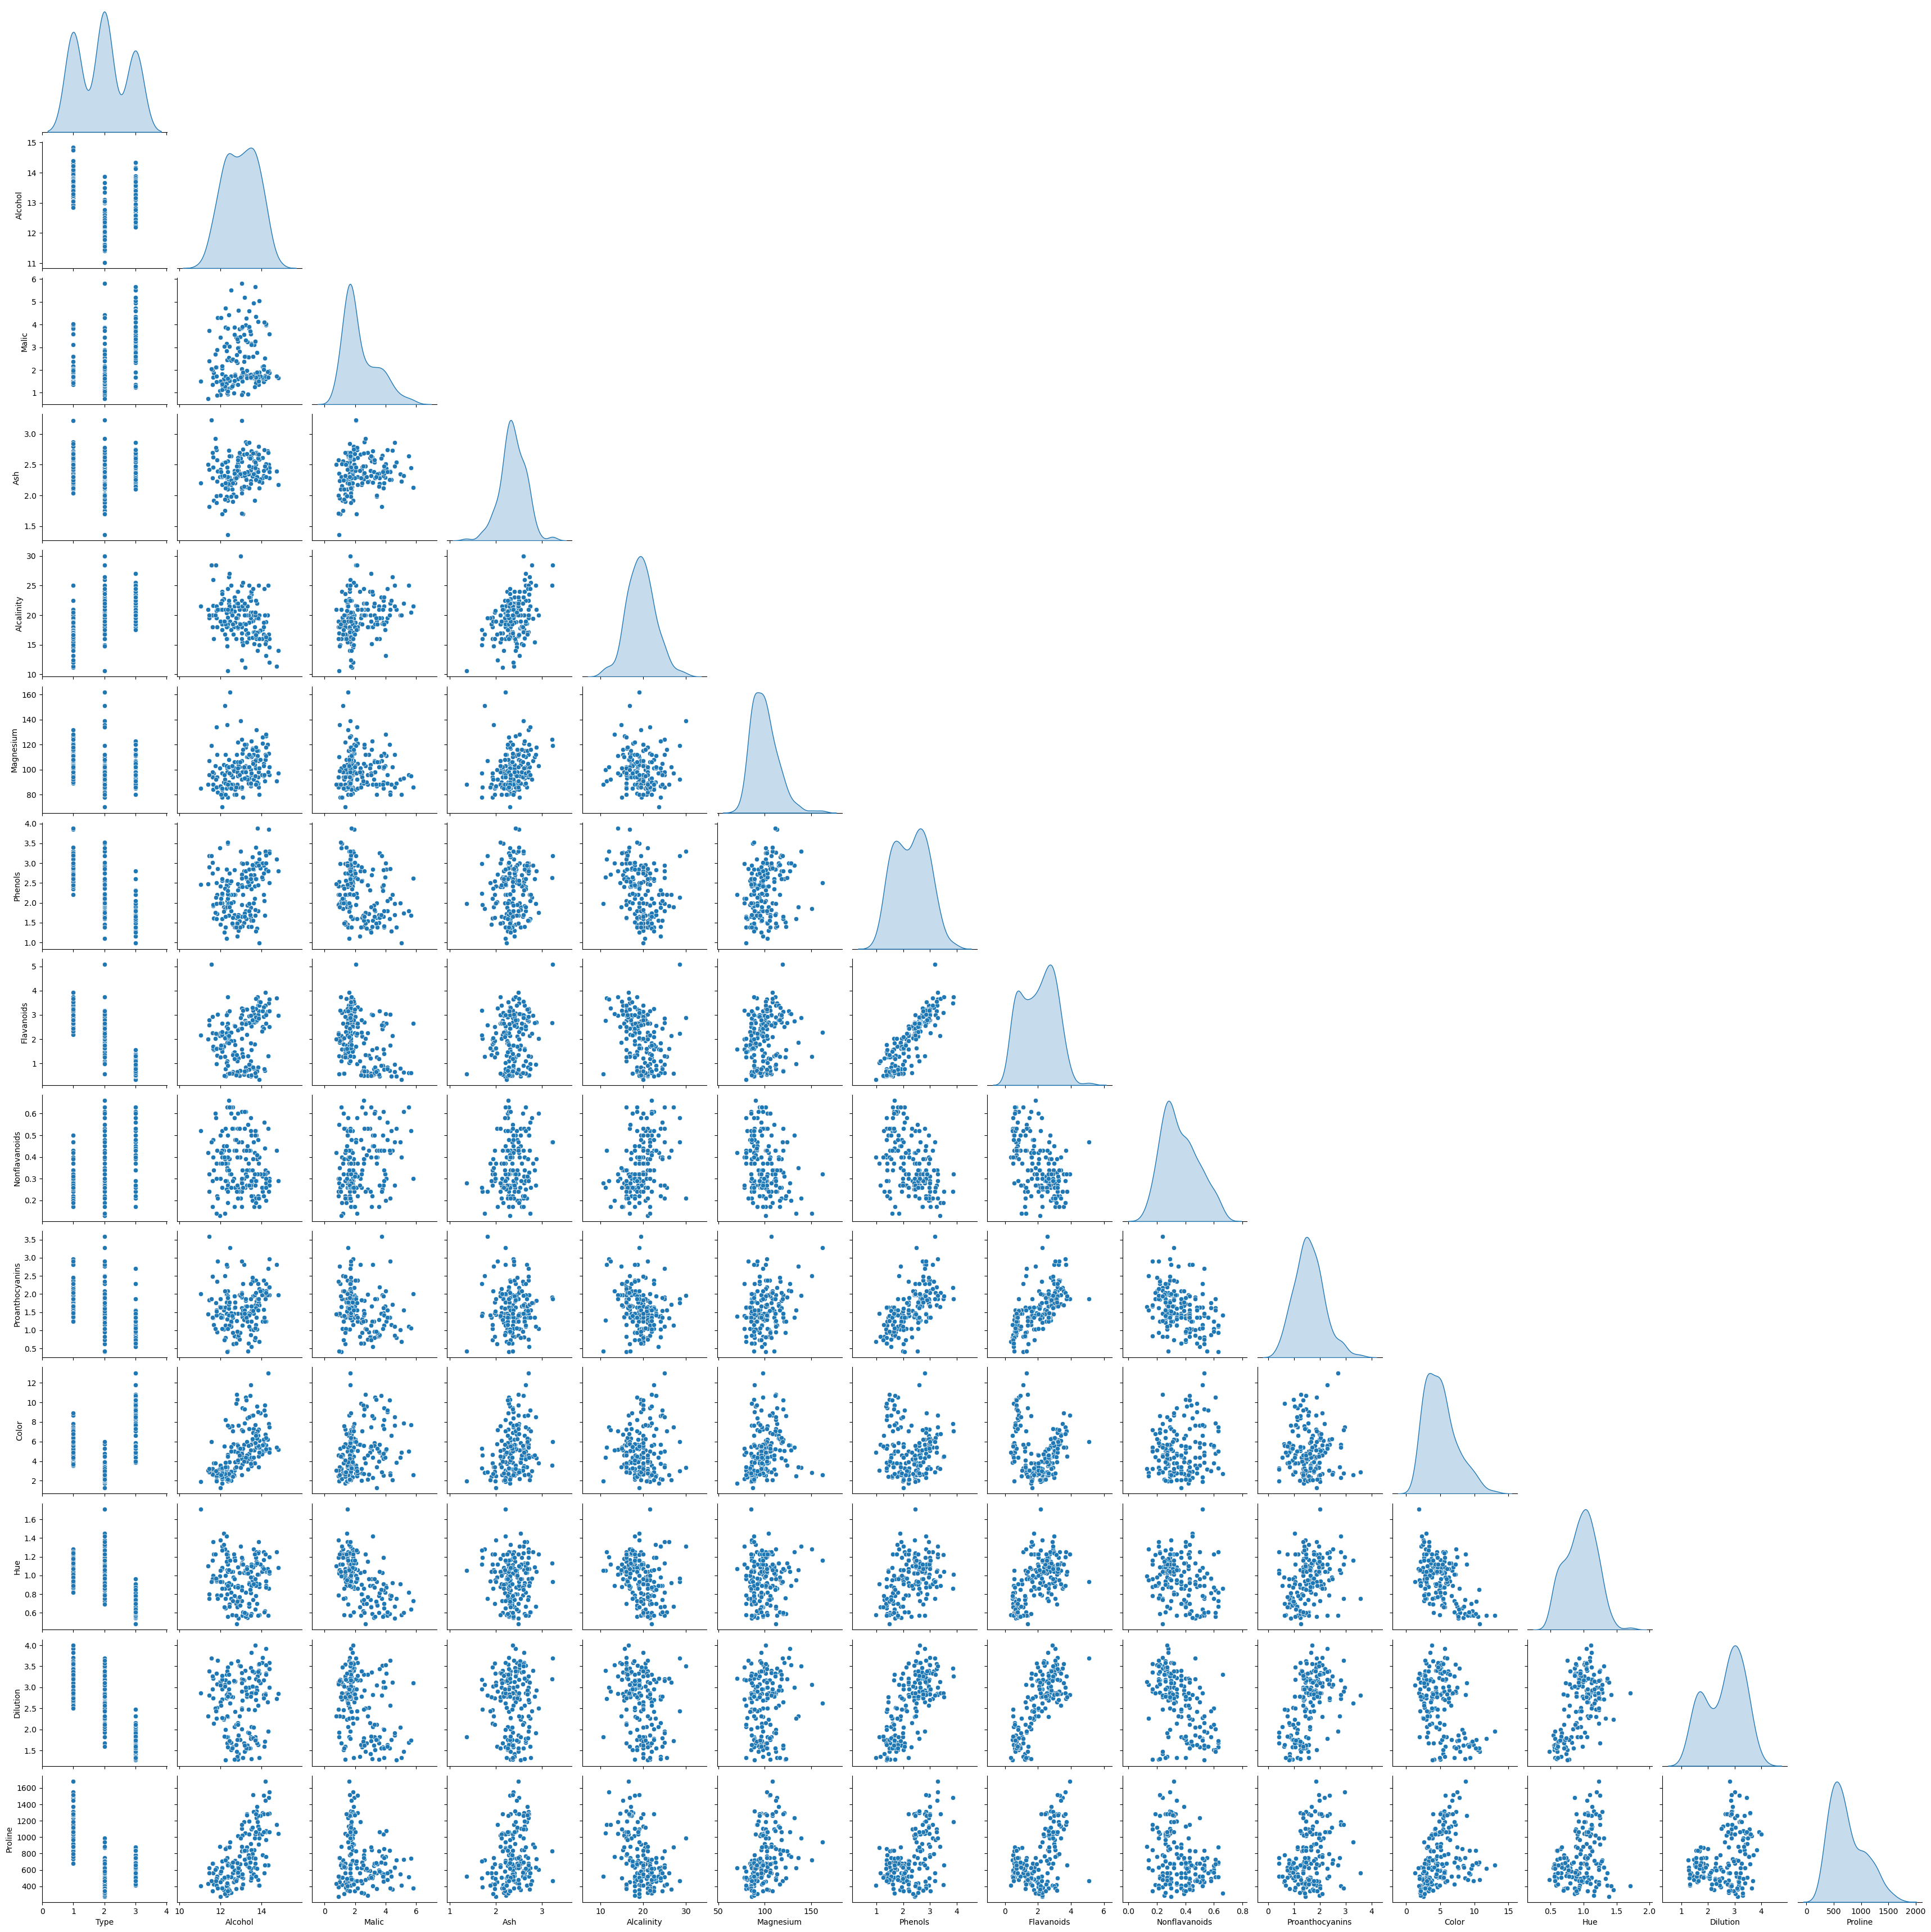

In [11]:
sns.pairplot(data = df,diag_kind = 'kde',corner = True );

# SCALING THE DATA

In [12]:
# import the standard scaler library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:])
df_scaled = pd.DataFrame(df_scaled,columns = df.columns[1:])
df_scaled.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874

In [13]:
df_scaled.describe().round(2)

Alcohol   Malic     Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
count   178.00  178.00  178.00      178.00     178.00   178.00      178.00   
mean     -0.00   -0.00   -0.00       -0.00      -0.00     0.00       -0.00   
std       1.00    1.00    1.00        1.00       1.00     1.00        1.00   
min      -2.43   -1.43   -3.68       -2.67      -2.09    -2.11       -1.70   
25%      -0.79   -0.66   -0.57       -0.69      -0.82    -0.89       -0.83   
50%       0.06   -0.42   -0.02        0.00      -0.12     0.10        0.11   
75%       0.84    0.67    0.70        0.60       0.51     0.81        0.85   
max       2.26    3.11    3.16        3.15       4.37     2.54        3.06   

       Nonflavanoids  Proanthocyanins   Color     Hue  Dilution  Proline  
count         178.00           178.00  178.00  178.00    178.00   178.00  
mean            0.00            -0.00    0.00    0.00      0.00    -0.00  
std             1.00             1.00    1.00    1.00      1.00     1.00  
min            -1.87            -2.07   -1.63   -2.09     -1.90    -1.49  
25%            -0.74            -0.60   -0.80   -0.77     -0.95    -0.78  
50%            -0.18            -0.06   -0.16    0.03      0.24    -0.23  
75%             0.61             0.63    0.49    0.71      0.79     0.76  
max             2.40             3.49    3.44    3.30      1.96     2.97

# Here mean = 0 and standard deviation  = 1 , Standard scaler done on the data

# implementing PCA

In [14]:
# IMPLEMENT FULL PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_df = pca.fit_transform(df_scaled)

In [15]:
pca_df = pd.DataFrame(pca_df)

In [16]:
pca_df

0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [17]:
pca_df.columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13']

In [18]:
pca_df

P1        P2        P3        P4        P5        P6        P7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           P8        P9       P10       P11       P12       P13  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [19]:
# get eigen values
eigen_values = pca.explained_variance_
eigen_values

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [20]:
eigen_vector = pca.components_

In [21]:
eigen_vector

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [22]:
eigen_vector.shape

(13, 13)

# Dimensionality reduction - optimal number of principal components

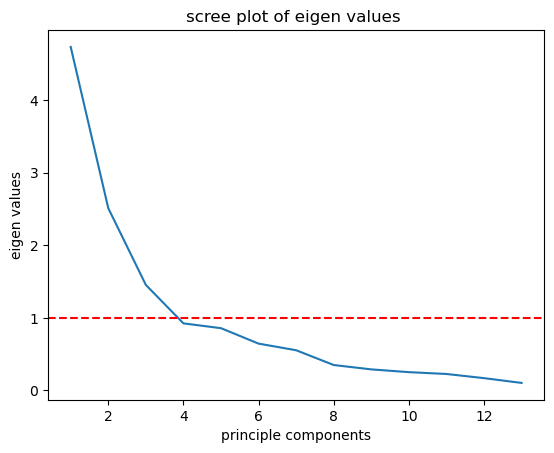

In [23]:
# deciding the optimal number of principal compoments - scree plot of eigen values with cutoff 1
sns.lineplot(x=range(1,14),y = eigen_values)
plt.axhline(y=1,color = 'r',linestyle='--')
plt.xlabel('principle components')
plt.ylabel('eigen values')
plt.title('scree plot of eigen values ');

In [24]:
# deciding the optimal number of components - cumulative variance explaines plot
exp_variance_ratio = pca.explained_variance_ratio_

In [25]:
exp_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [26]:
cum_exp_variance_ratio = np.cumsum(exp_variance_ratio)

In [27]:
cum_exp_variance_ratio

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

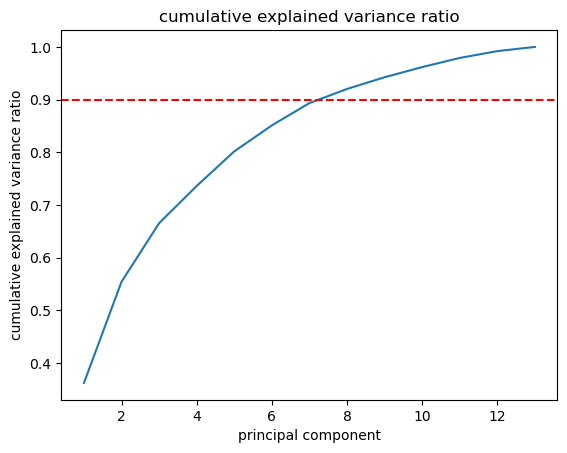

In [28]:
# line plot of cumulative explained ratio
sns.lineplot(x= range(1,14),y = cum_exp_variance_ratio)
plt.axhline(y = 0.90,color = 'r',linestyle = '--')
plt.xlabel('principal component')
plt.ylabel('cumulative explained variance ratio')
plt.title('cumulative explained variance ratio');

In [29]:
pca_new = PCA(n_components=0.92)
pca_new_df = pca_new.fit_transform(df_scaled)
pca_new_df = pd.DataFrame(pca_new_df)

In [30]:
pca_new_df.head()

0         1         2         3         4         5         6  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

          7  
0  0.065139  
1  1.024416  
2 -0.344216  
3  0.643593  
4  0.416700

# To retain the 92 % of the variance in the data we need 8 features

In [31]:
pca_3 = PCA(n_components=3)
pca_3_df = pca_3.fit_transform(df_scaled)
pca_3_df = pd.DataFrame(pca_3_df)

In [32]:
pca_3_df.head()

0         1         2
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

In [33]:
pca_3_df.columns = ['PC1','PC2','PC3']

In [34]:
pca_3_df.head()

PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

In [35]:
pca_3_df.shape

(178, 3)

# KMEANS CLUSTERING

In [36]:
# import KMEANS clustering and performing clustering analysis with first three principle components
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [37]:
# find optimum number of clusters using elbow method
noc = []
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(pca_3_df)
    noc.append(km.inertia_)

In [38]:
noc

[1539.503480188307,
 886.1611364823501,
 512.9995067661517,
 429.61967982630296,
 370.88883220672307,
 327.9712795620447,
 286.7591094975911,
 262.51845769197746,
 238.10574584486756]

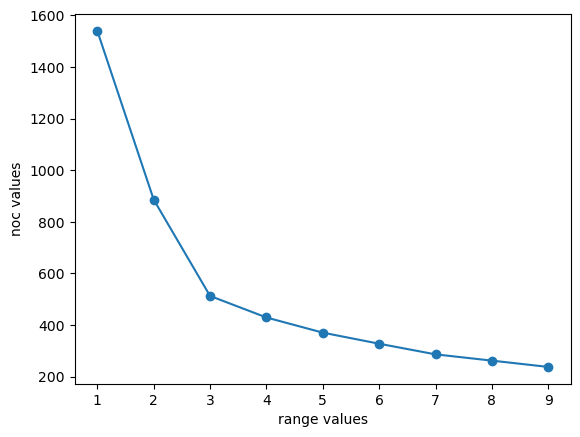

In [39]:
# plot the elbow curve
plt.plot(range(1,10),noc,marker = 'o')
plt.xlabel('range values')
plt.ylabel('noc values');

# From the above , we can say that the number of clustering will be 3

In [40]:
km_3 = KMeans(n_clusters = 3)
km_3.fit(pca_3_df)

KMeans(n_clusters=3)

In [41]:
labels_km3 = km_3.labels_

In [42]:
labels_km3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [43]:
pca_3_df['labels_km3'] = labels_km3

In [44]:
pca_3_df.head()

PC1       PC2       PC3  labels_km3
0  3.316751 -1.443463 -0.165739           1
1  2.209465  0.333393 -2.026457           1
2  2.516740 -1.031151  0.982819           1
3  3.757066 -2.756372 -0.176192           1
4  1.008908 -0.869831  2.026688           1

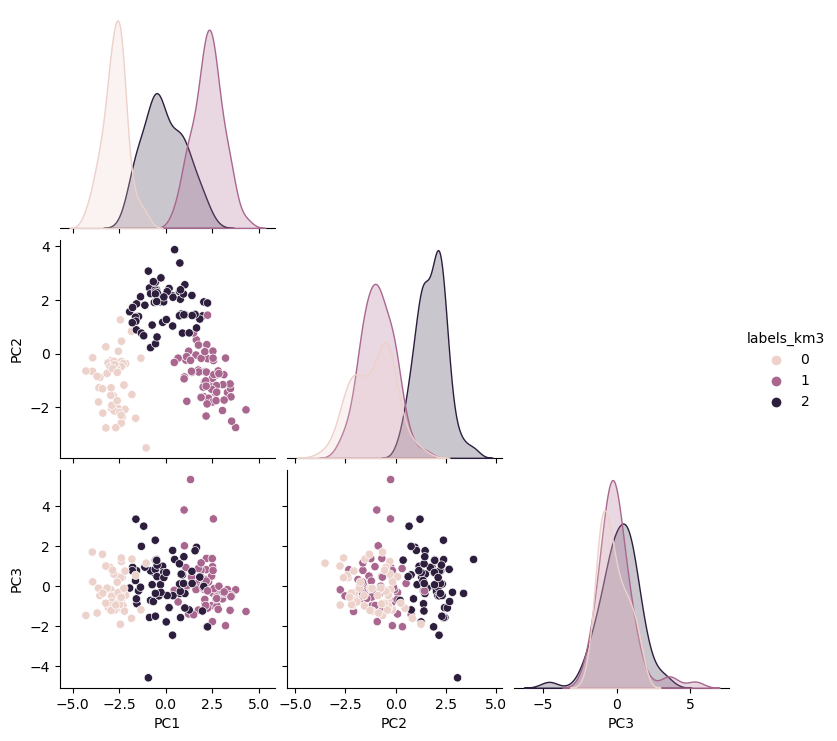

In [45]:
sns.pairplot(data = pca_3_df,hue = 'labels_km3',diag_kind = 'kde',corner = True);

In [46]:
pca_3_df.groupby('labels_km3').mean().round(2)

PC1   PC2   PC3
labels_km3                  
0          -2.72 -1.13 -0.24
1           2.28 -0.89 -0.00
2          -0.07  1.78  0.19

# Performimg Kmeans clustering on full data set

In [47]:
# Find optimum number of clusters by elbow curve
noc = []
for k in range(1,13):
    km = KMeans(n_clusters = k)
    km.fit(df_scaled)
    noc.append(km.inertia_)

In [48]:
noc

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1179.8985768715013,
 1111.13317879459,
 1040.883680570655,
 988.3880933229252,
 932.214344527994,
 899.8263160145141,
 862.2421878987709,
 827.0109739575532,
 811.9322479851661]

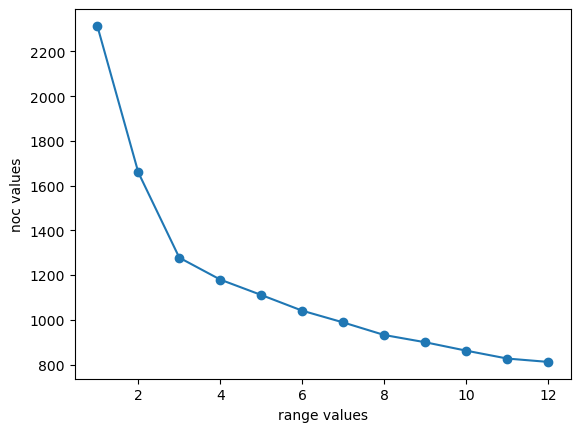

In [49]:
# plot the elbow curve
plt.plot(range(1,13),noc,marker = 'o')
plt.xlabel('range values')
plt.ylabel('noc values');

# On the full data set also we are getting number of clusters will be 3 by elbow curve

In [50]:
km_final = KMeans(n_clusters = 3,random_state=123)
km_final.fit(df_scaled)
labels = km_final.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [51]:
df['cluster_labels'] = labels

In [52]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   cluster_labels  
0               1  
1               1  
2               1  
3               1  
4               1

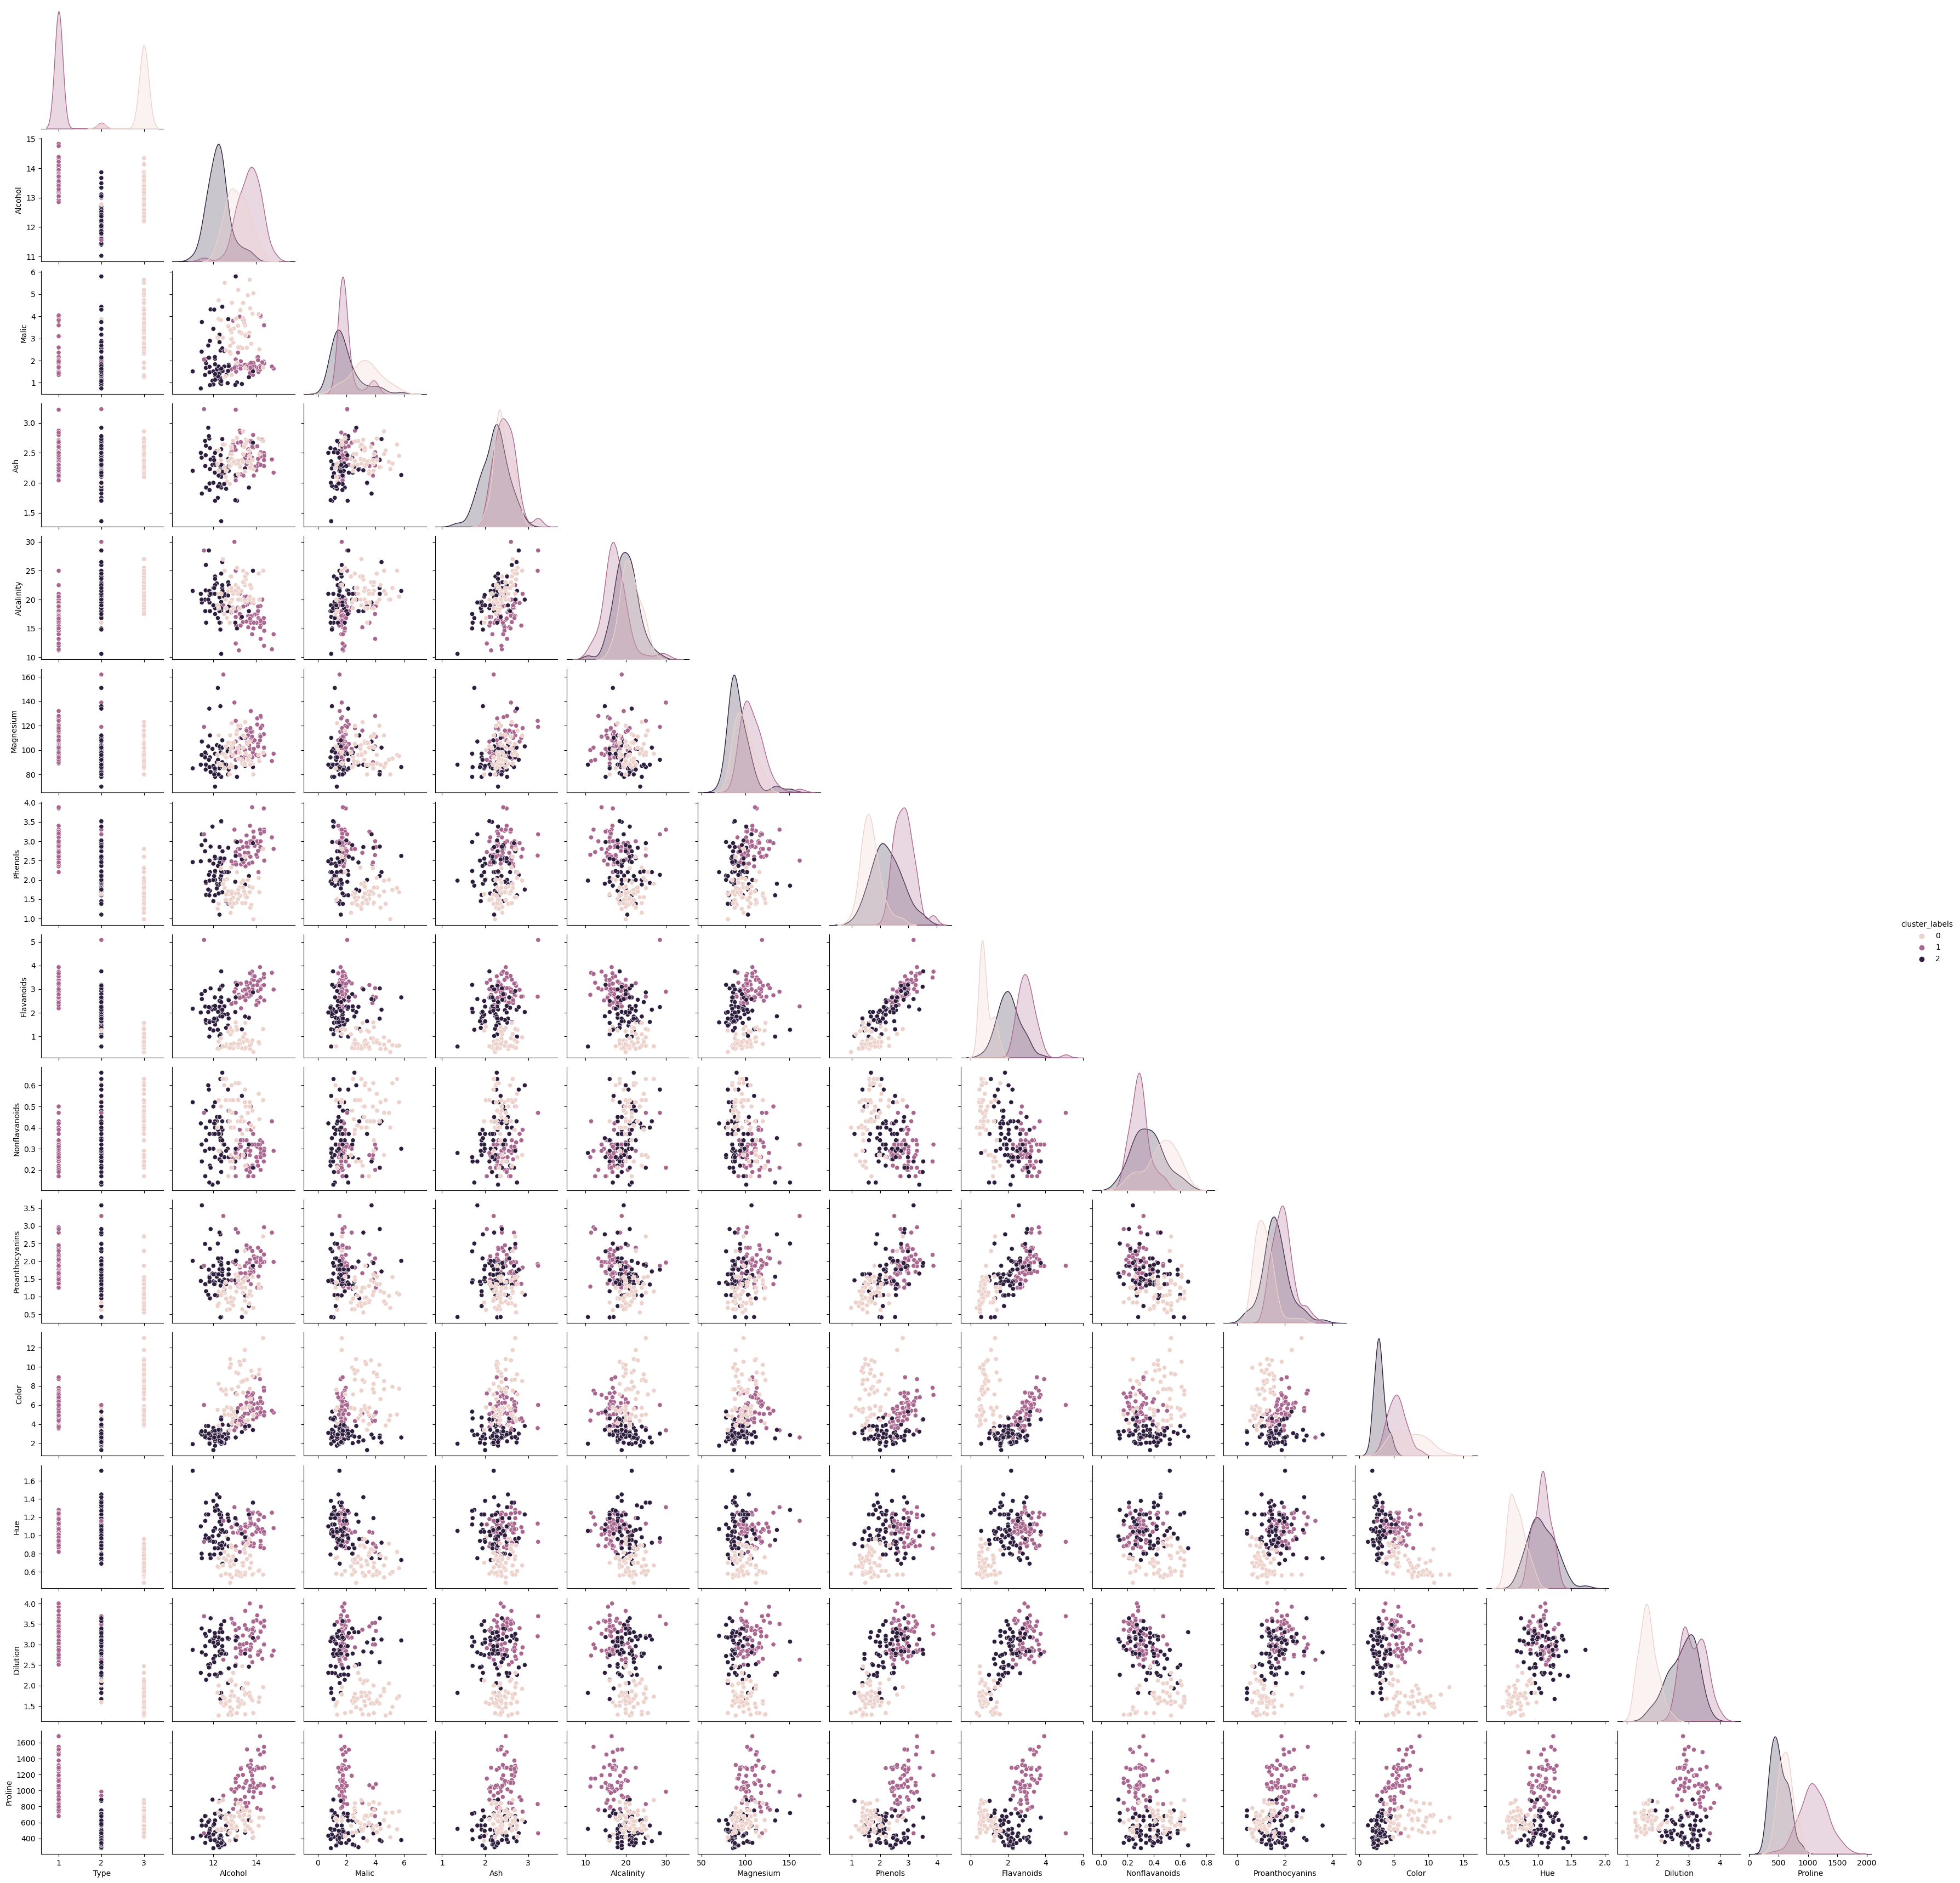

In [53]:
# plot a pairplot with cluster label as hue
sns.pairplot(data = df,hue = 'cluster_labels',diag_kind = 'kde',corner = True);

In [54]:
df.groupby('cluster_labels').mean().round(2)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  \
cluster_labels                                                               
0               2.94    13.13   3.31  2.42       21.24      98.67     1.68   
1               1.05    13.68   2.00  2.47       17.46     107.97     2.85   
2               2.00    12.25   1.90  2.23       20.06      92.74     2.25   

                Flavanoids  Nonflavanoids  Proanthocyanins  Color   Hue  \
cluster_labels                                                            
0                     0.82           0.45             1.15   7.23  0.69   
1                     3.00           0.29             1.92   5.45  1.07   
2                     2.05           0.36             1.62   2.97  1.06   

                Dilution  Proline  
cluster_labels                     
0                   1.70   619.06  
1                   3.16  1100.23  
2                   2.80   510.17

# From the above , We can sat that As the acohol percentage increase the Ash , proline also increse and Alcainity is decreasing

#

# HIERARCIAL CLUSTERING

In [55]:
# clustering using AgglomerativeClustering from sklearn with number of clustering = 3
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [56]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_scaled)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [58]:
# add cluster labels to the dataset
df['cluster_labels_agg'] = labels
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   cluster_labels  cluster_labels_agg  
0               2                   2  
1               2                   2  
2               2                   2  
3               2                   2  
4               2                   2

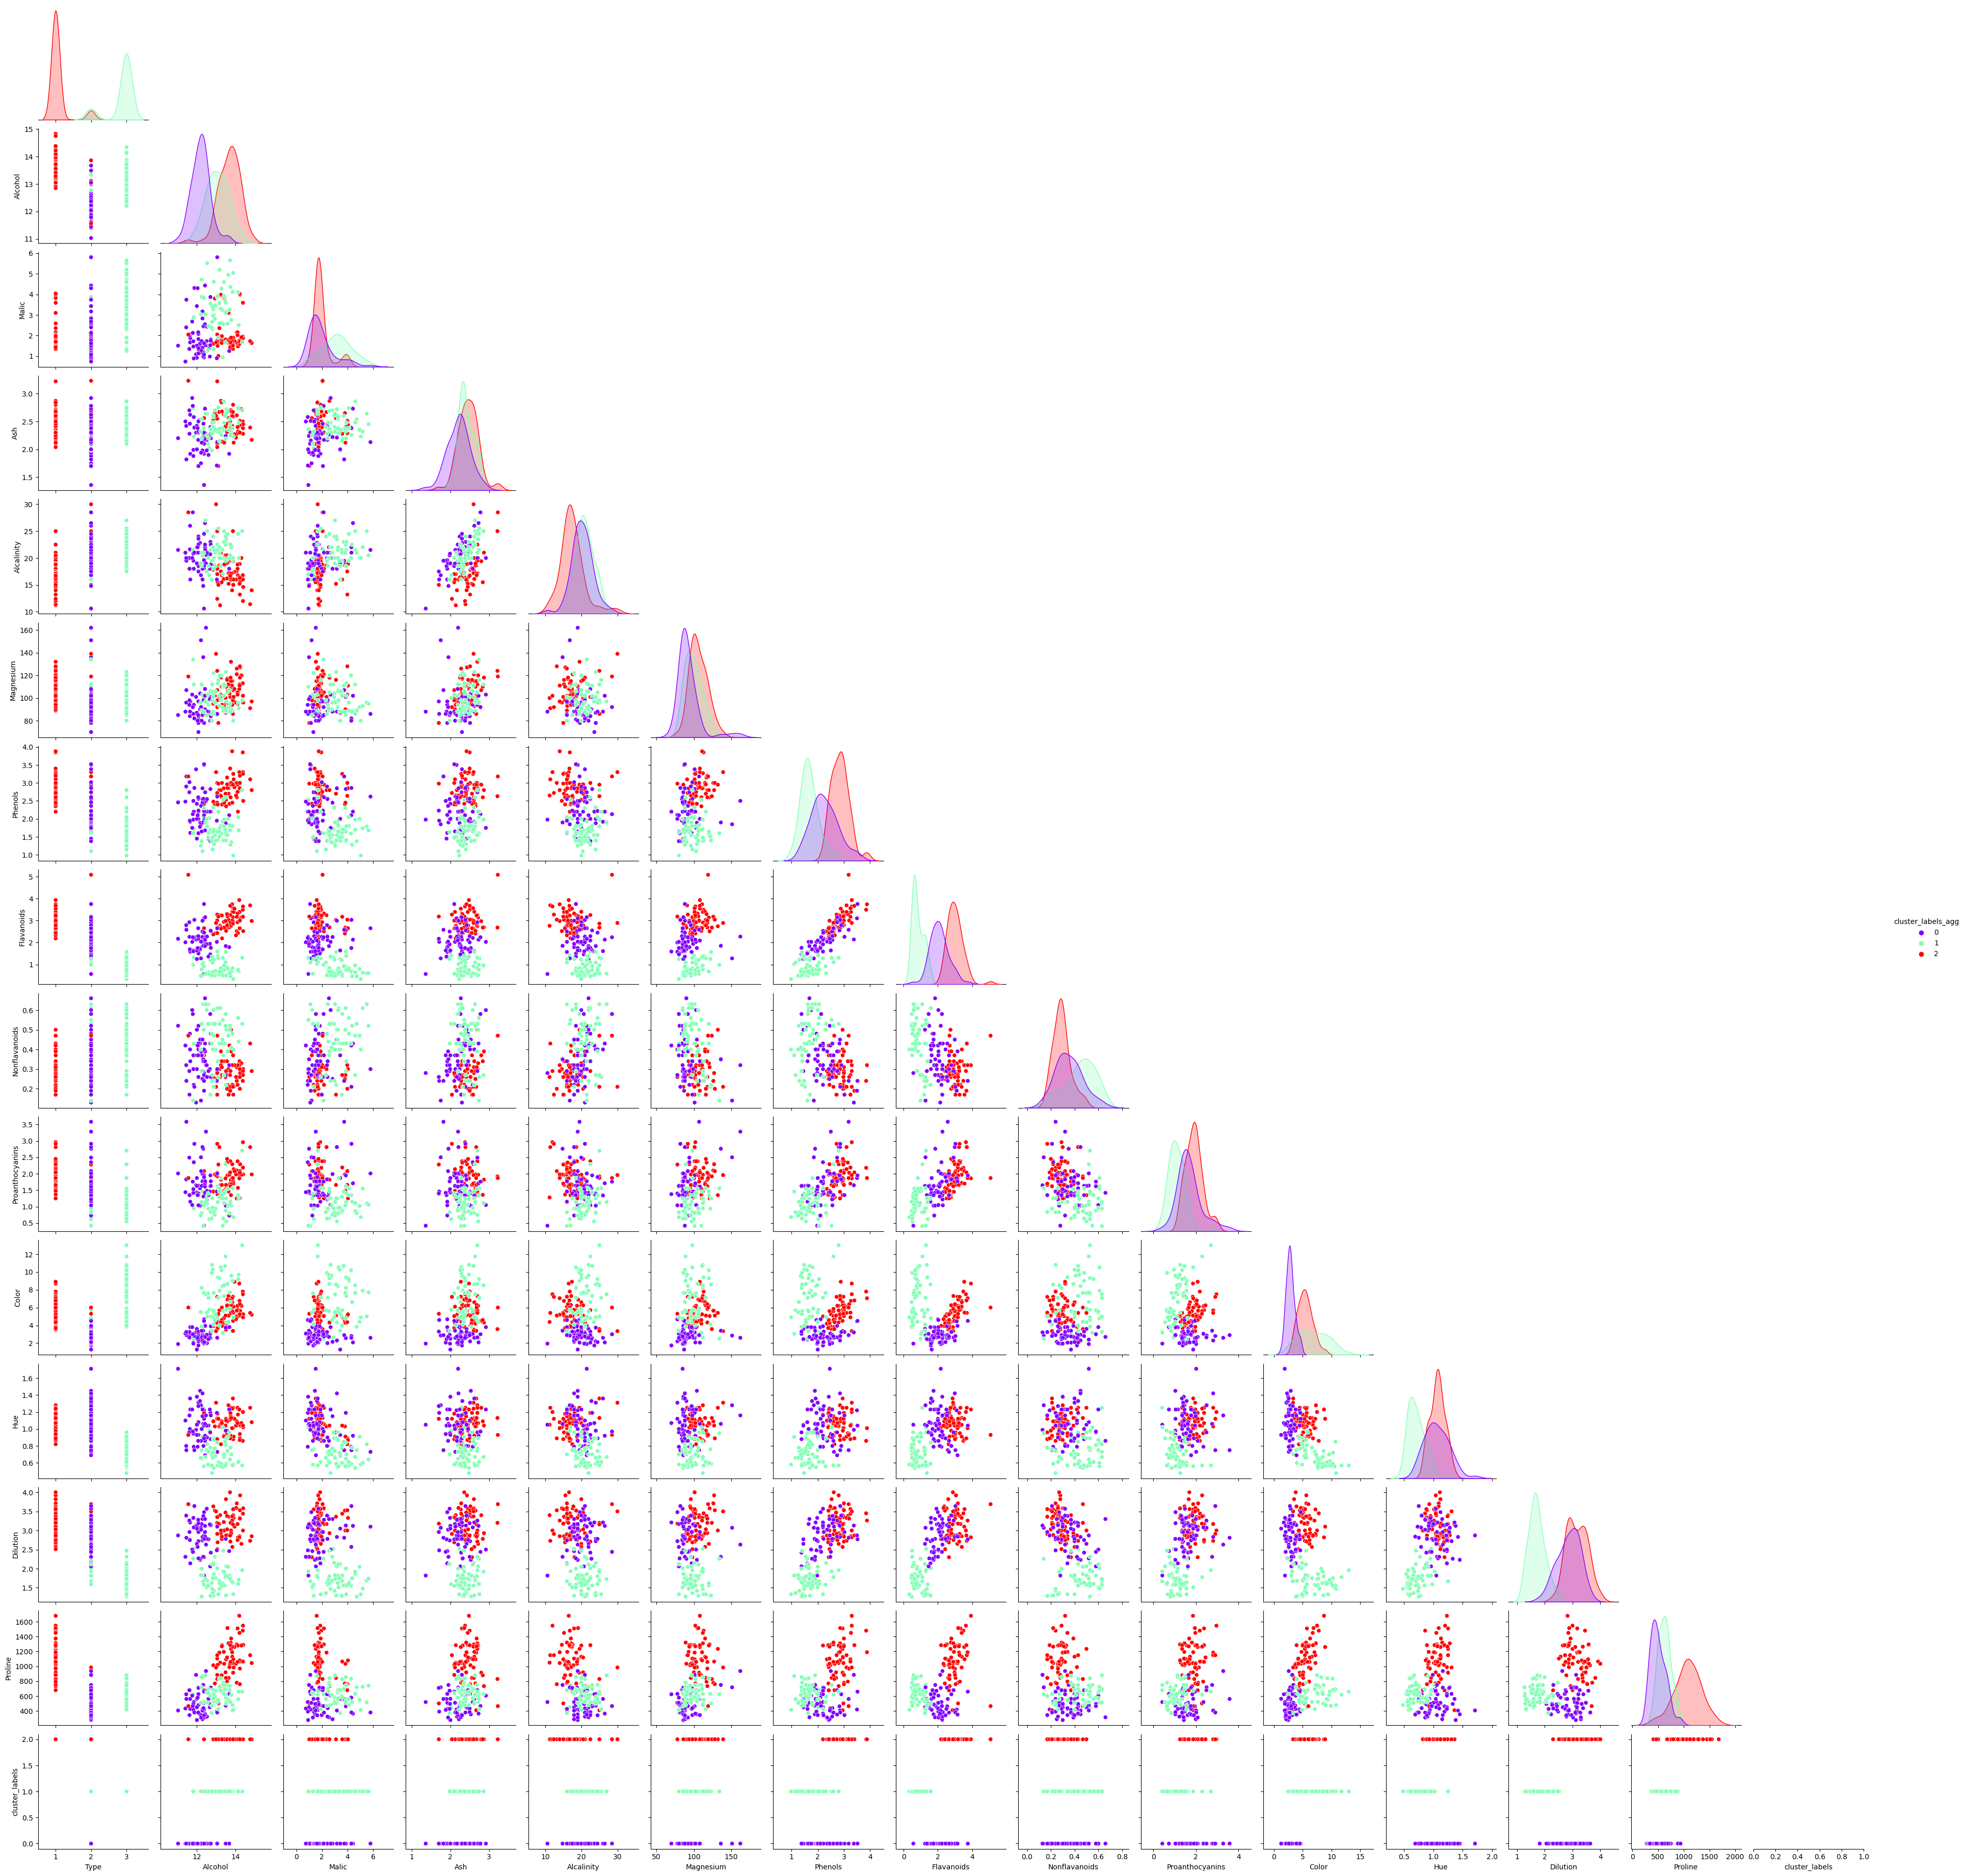

In [59]:
# plot the pairplot with hue based on cluster label
sns.pairplot(data = df, hue='cluster_labels_agg', palette='rainbow',corner=True,diag_kind='kde');

In [60]:
df.groupby('cluster_labels_agg').mean().round(2)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  \
cluster_labels_agg                                                      
0                   2.00    12.20   1.94  2.22       20.21      92.55   
1                   2.86    13.06   3.17  2.41       21.00      99.86   
2                   1.08    13.67   1.97  2.46       17.53     106.16   

                    Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
cluster_labels_agg                                                        
0                      2.26        2.09           0.36             1.69   
1                      1.69        0.85           0.45             1.13   
2                      2.85        3.01           0.29             1.91   

                    Color   Hue  Dilution  Proline  cluster_labels  
cluster_labels_agg                                                  
0                    2.90  1.06      2.86   501.43             0.0  
1                    6.85  0.72      1.73   624.95             1.0  
2                    5.45  1.07      3.16  1076.05             2.0

# From the above , we can say that the as Alcohol content increase Ash , Magnesium,proline  content increasing 